In [63]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from ast import literal_eval
import pickle
import pprint
from matplotlib.cbook import boxplot_stats
pp = pprint.PrettyPrinter(depth=6)
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 150)

In [4]:
csv_folder = "../../csv"

In [5]:
builds = pd.read_csv(f"{csv_folder}/allBuilds.csv", index_col=0)
builds["finished_at"] = pd.to_datetime(builds.finished_at)
builds["started_at"] = pd.to_datetime(builds.started_at)
builds

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state
0,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed
1,6994,NaN,99100662,push,2015-12-28 14:36:03+00:00,NaN,2015-12-28 14:18:30+00:00,5953.0,passed
2,6993,NaN,99093472,push,2015-12-28 13:27:51+00:00,NaN,2015-12-28 13:11:39+00:00,5166.0,passed
3,6992,NaN,99086186,push,2015-12-28 12:18:41+00:00,NaN,2015-12-28 12:10:56+00:00,5243.0,passed
4,6991,NaN,99078711,push,2015-12-28 10:56:34+00:00,NaN,2015-12-28 10:41:16+00:00,5045.0,passed
...,...,...,...,...,...,...,...,...,...
126,12162,1121.0,148002763,pull_request,2016-07-28 11:22:06+00:00,Provide WS to manage project links,2016-07-28 10:59:31+00:00,1431.0,passed
127,12163,NaN,148005346,push,2016-07-28 11:33:17+00:00,NaN,2016-07-28 11:13:59+00:00,1232.0,passed
128,12164,1121.0,148005355,pull_request,2016-07-28 11:34:11+00:00,Provide WS to manage project links,2016-07-28 11:14:09+00:00,1279.0,passed
129,12165,1121.0,148010751,pull_request,2016-07-28 12:02:21+00:00,Provide WS to manage project links,2016-07-28 11:41:56+00:00,1338.0,passed


### Shape

In [23]:
builds.shape

(39514, 12)

### Stats

In [29]:
builds.describe()

,number,pull_request_number,id,duration,started_at_day,started_at_month,started_at_year
count,39514.000000,12874.000000,3.951400e+04,39512.000000,37386.000000,37386.000000,37386.000000
mean,19700.828845,1835.283673,2.067872e+08,1583.936171,15.524608,6.262986,2016.546515
std,11372.944248,849.071851,1.001020e+08,3203.039479,8.603006,3.333122,0.964082
min,1.000000,149.000000,5.473112e+07,-218596.000000,1.000000,1.000000,2015.000000
25%,9879.250000,1178.000000,1.277855e+08,208.000000,8.000000,3.000000,2016.000000
50%,19670.500000,1910.000000,2.096530e+08,1121.500000,15.000000,6.000000,2017.000000
75%,29548.750000,2540.000000,2.699600e+08,1698.000000,23.000000,9.000000,2017.000000
max,39427.000000,3250.000000,7.313960e+08,414912.000000,31.000000,12.000000,2020.000000


In [27]:
builds.describe(include = ['O'])

,event_type,pull_request_title,state
count,39514,12874,39514
unique,3,3066,4
top,push,Use Gradle instead of Maven,passed
freq,24522,103,23569


* There is a negative duration which may be an error
* 75% of the builds happened in 2017
* Others fields seem to have reasonalbe values
* "Use Gradle instead of Maven" is the most common pull_request_title. The switch from maven to gradle has apparently required many tries
* Most of the events are push
* Most of the states are passed

**Missing values**

In [99]:
builds.isna().sum()

number                     0
pull_request_number    26629
id                         0
event_type                 0
finished_at                1
pull_request_title     26629
started_at              2128
duration                   2
state                      0
started_at_day          2128
started_at_month        2128
started_at_year         2128
dtype: int64

* We do not worry about pull requests missing values as not all the builds are pull request related
* Duration has 2 NaN (to be investigated)
* Started at has many NaN (to be investigated)
* Finished at has 1 NaN (to be investigated)

### Time range

In [7]:
builds.started_at.min()

Timestamp('2015-03-17 15:04:32+0000', tz='UTC')

In [8]:
builds.started_at.max()

Timestamp('2020-09-29 20:09:07+0000', tz='UTC')

**Missing value finished_at**

In [101]:
builds[builds.finished_at.isna()]

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state,started_at_day,started_at_month,started_at_year
5691,5304,NaN,84464803,push,NaT,NaN,2015-10-09 09:14:28+00:00,NaN,canceled,9.0,10.0,2015.0


**Missing value started_at**

In [103]:
builds[builds.started_at.isna()]

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state,started_at_day,started_at_month,started_at_year
39,6956,698.0,98109984,pull_request,2015-12-21 12:55:52+00:00,SONAR-7129 WS api/components/tree,NaT,0.0,canceled,NaN,NaN,NaN
40,6955,NaN,98109967,push,2015-12-21 12:55:48+00:00,NaN,NaT,0.0,canceled,NaN,NaN,NaN
62,6933,NaN,97691793,push,2015-12-18 15:44:49+00:00,NaN,NaT,0.0,canceled,NaN,NaN,NaN
83,6912,697.0,97487849,pull_request,2015-12-17 16:49:02+00:00,Update Travis build to use JDK 7 for Dory anal...,NaT,0.0,canceled,NaN,NaN,NaN
84,6911,NaN,97487829,push,2015-12-17 16:49:35+00:00,NaN,NaT,0.0,canceled,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
53,12089,NaN,147165948,push,2016-07-25 11:48:05+00:00,NaN,NaT,0.0,canceled,NaN,NaN,NaN
83,12119,NaN,147486281,push,2016-07-26 14:21:51+00:00,NaN,NaT,0.0,canceled,NaN,NaN,NaN
84,12120,1118.0,147486321,pull_request,2016-07-26 14:22:09+00:00,"Rewrite ""Quality Profiles"" project page",NaT,0.0,canceled,NaN,NaN,NaN
107,12143,NaN,147807772,push,2016-07-27 16:36:24+00:00,NaN,NaT,0.0,canceled,NaN,NaN,NaN


<AxesSubplot:xlabel='state', ylabel='count'>

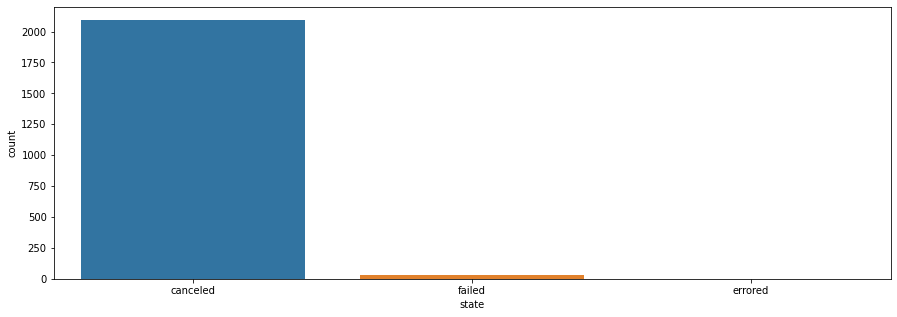

In [104]:
sns.countplot(builds[builds.started_at.isna()].state)

Missing values of started_at and finished_at are due to canceled and failed builds. This is acceptable

**Time distribution**

In [9]:
builds["started_at_day"] = builds.started_at.dt.day
builds["started_at_month"] = builds.started_at.dt.month
builds["started_at_year"] = builds.started_at.dt.year

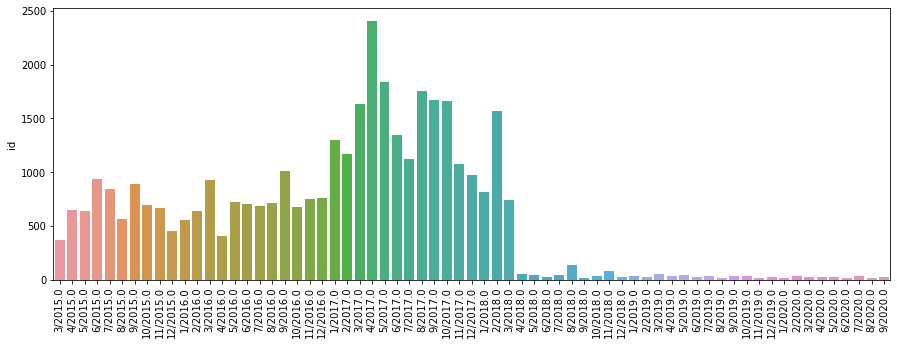

In [10]:
time_group = ["started_at_year", "started_at_month"]
x = builds.groupby(time_group).id.count().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id)
ax.set_xticklabels(list(x.started_at_month.astype(int).astype(str) + "/" + x.started_at_year.astype(str)),
                  rotation=90)
plt.show()

There has been a decrease of number of builds per month after 3/2018. This can possibly be due to change in configuration in travis CI

**Is the change related to moving from Maven to Gradle?**

In [33]:
builds[builds.pull_request_title=="Use Gradle instead of Maven"].finished_at.max()

Timestamp('2018-03-09 10:55:42+0000', tz='UTC')

It seems like this may be the case, as the last pr build about moving to Gradle happened exactly in 3/2018. This switch may signify a larger cleaning and restructuring of the Continuous Integration process.

### Event type

<AxesSubplot:xlabel='event_type', ylabel='count'>

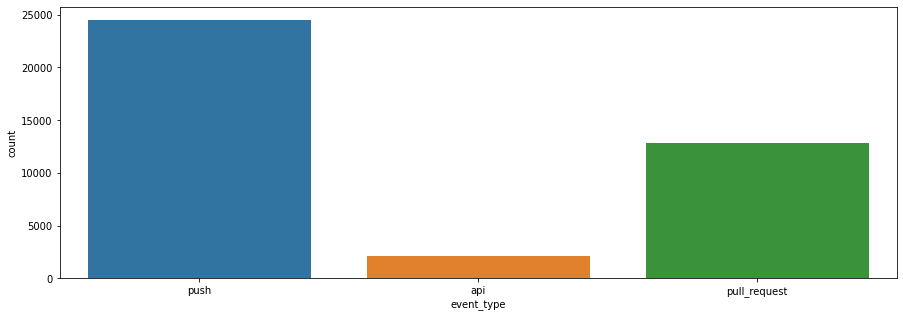

In [11]:
sns.countplot(builds.event_type)

Most of the builds have been triggered by a push event

In [12]:
after_decrease = builds[(builds.started_at_month > 3) & (builds.started_at_year > 2018)]
before_decrease = builds[~builds.index.isin(after_decrease.index)]

Text(0.5, 1.0, 'After decrease')

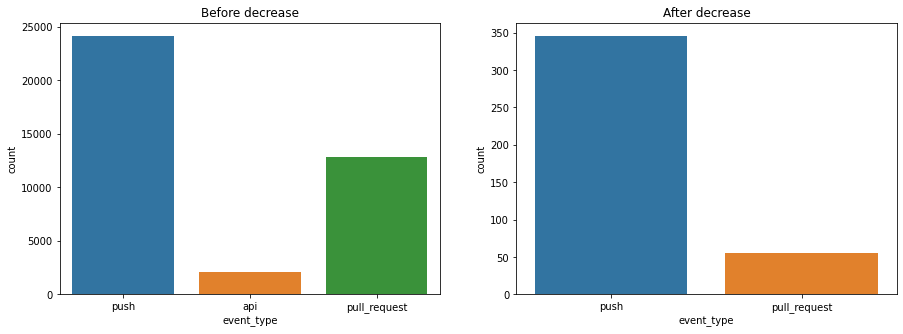

In [13]:
f, axes = plt.subplots(1,2)
sns.countplot(before_decrease.event_type, ax=axes[0])
axes[0].set_title("Before decrease")
sns.countplot(after_decrease.event_type, ax=axes[1])
axes[1].set_title("After decrease")

### Pull request number

In [14]:
builds.pull_request_number.max()

3250.0

In [15]:
builds.pull_request_number.min()

149.0

In [16]:
builds.pull_request_number.describe()

count    12874.000000
mean      1835.283673
std        849.071851
min        149.000000
25%       1178.000000
50%       1910.000000
75%       2540.000000
max       3250.000000
Name: pull_request_number, dtype: float64

In [17]:
len(builds.pull_request_number.unique())

3044

In [18]:
len(builds.pull_request_number.unique()) - (builds.pull_request_number.max() - builds.pull_request_number.min())

-57.0

Text(0, 0.5, 'Builds per pull request')

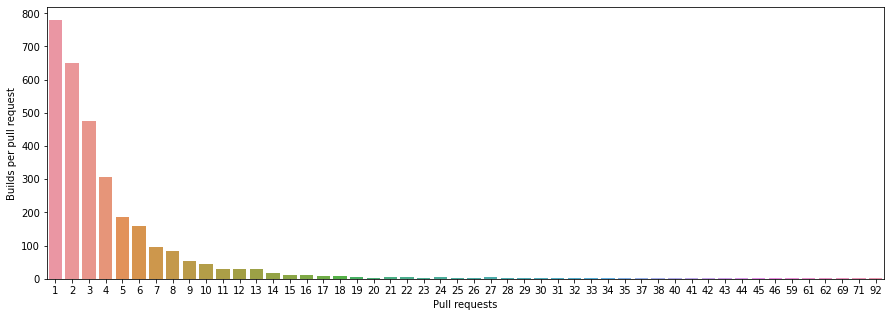

In [19]:
ax = sns.countplot(builds.groupby(builds.pull_request_number).id.count().values)
ax.set_xlabel("Pull requests")
ax.set_ylabel("Builds per pull request")

* There are 3044 pull requests which triggered builds on TravisCI. 
* Given the highest pull request number and the smallest, there are 57 which did not trigger anything on TravisCI.
* The distribution of number of builds per pr has a long tail. The majority stays in the range 1-10 but the number goes all the way up to 92

### State

<AxesSubplot:xlabel='state', ylabel='count'>

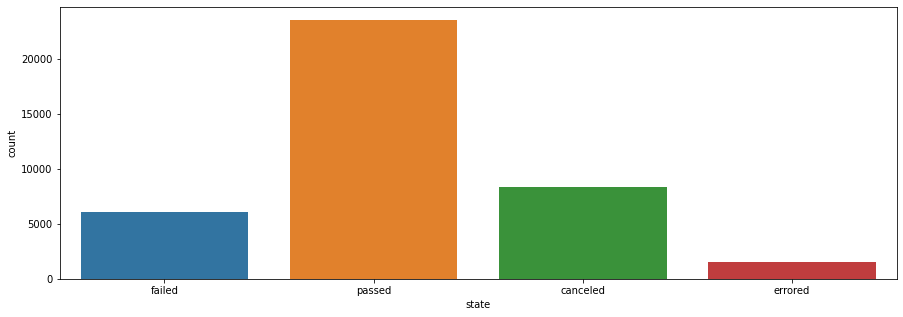

In [20]:
sns.countplot(builds.state)

Text(0.5, 1.0, 'After decrease')

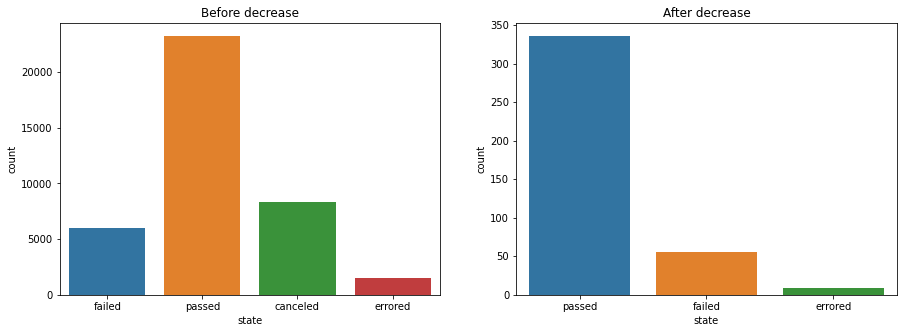

In [21]:
f, axes = plt.subplots(1,2)
sns.countplot(before_decrease.state, ax=axes[0])
axes[0].set_title("Before decrease")
sns.countplot(after_decrease.state, ax=axes[1])
axes[1].set_title("After decrease")

* After the decrease (3/2018) no canceled builds are present. This may hint at a more stable workflow implemented which triggeres fewer and only the needed builds.

**What is the state distribution for pull requests with many builds?**

<AxesSubplot:xlabel='state', ylabel='count'>

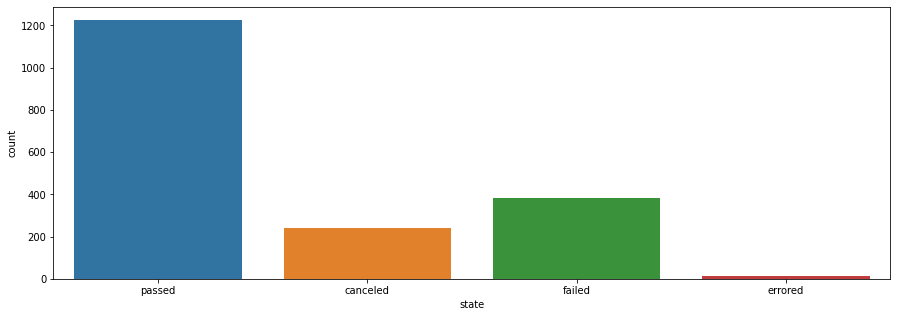

In [22]:
pr_build_count = builds.groupby(builds.pull_request_number).id.count()
pr_build_tail =  list(pr_build_count[pr_build_count > 20].index)
sns.countplot(builds[builds.pull_request_number.isin(pr_build_tail)].state)

### Duration

<AxesSubplot:xlabel='state', ylabel='count'>

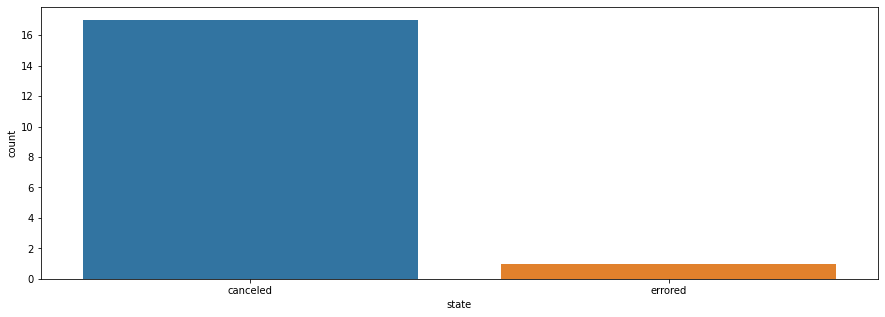

In [35]:
sns.countplot(builds[builds.duration < 0].state)

All builds with negative duration are either in canceled or errored state

<AxesSubplot:xlabel='state', ylabel='count'>

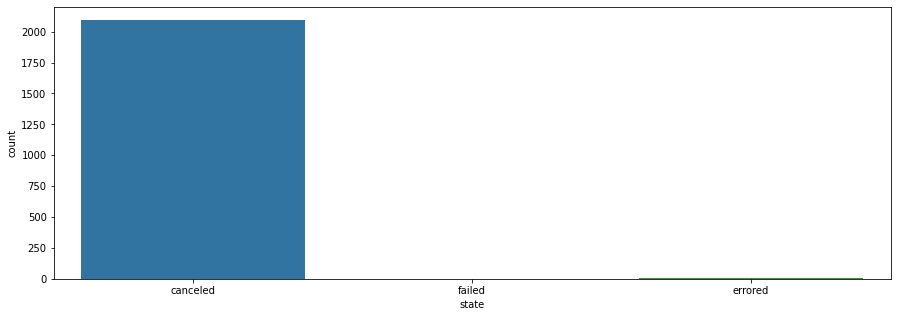

In [37]:
sns.countplot(builds[builds.duration == 0].state)

A more proper value is 0 for those builds (which some builds already have). Negative duration should not be allowed.

**Imputing negative outliers**

In [40]:
builds[builds.duration < 0] = 0

**Investigating positive outliers**

<AxesSubplot:>

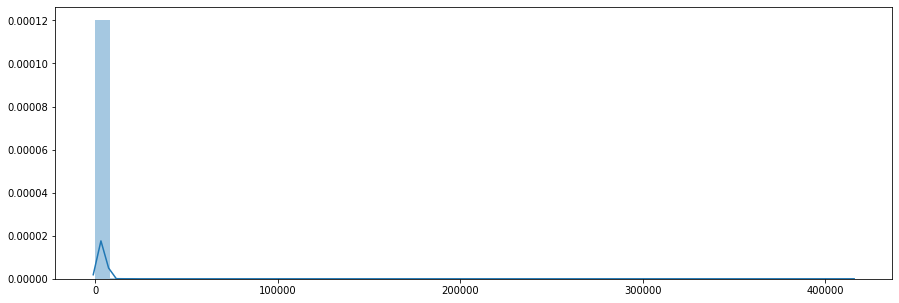

In [60]:
sns.distplot(list(builds.duration.sort_values()))

<AxesSubplot:>

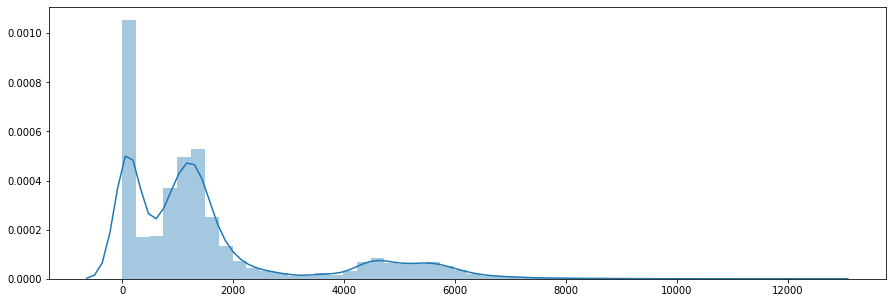

In [61]:
sns.distplot(list(builds.duration.sort_values())[:-20])

<AxesSubplot:xlabel='duration'>

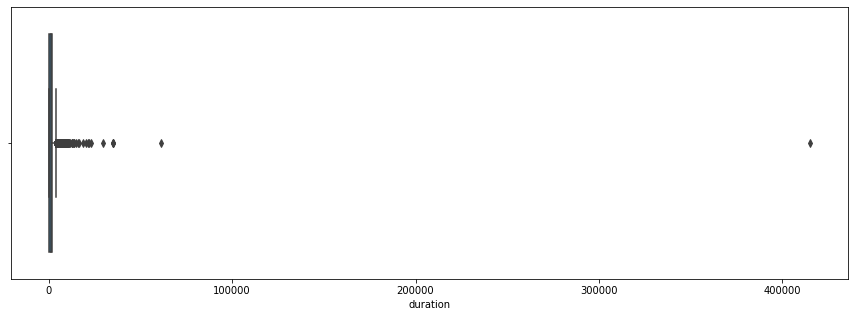

In [86]:
sns.boxplot(builds.duration)

In [96]:
boxplot_stats(builds.duration.dropna())[0]["fliers"].min()

3939.0

We detect the presence of many outliers, the smallest of which is 3939 seconds (more than an hour)

**Distribution of outliers**

In [106]:
duration_outliers = builds[builds.duration > 3939]

Text(0.5, 1.0, 'Year')

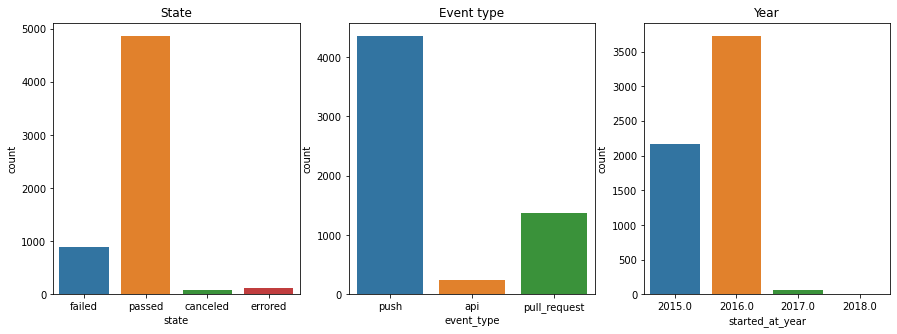

In [111]:
f, axes = plt.subplots(1,3)
sns.countplot(duration_outliers.state, ax=axes[0])
axes[0].set_title("State")
sns.countplot(duration_outliers.event_type, ax=axes[1])
axes[1].set_title("Event type")
sns.countplot(duration_outliers.started_at_year, ax=axes[2])
axes[2].set_title("Year")

* State and event type distribution seem to follow the distribution of the whole dataset
* These outliers seem to be concentrated in the early years of the project on TravisCI. Maybe this is due to inexperience with CI processes and misconfigurations of builds